In [1]:
import os
import cv2
import numpy as np
import time
from fitter import Fitter

def getavgstd(image):
    avg = []
    std = []
    image_avg_l = np.mean(image[:, :, 0])
    image_std_l = np.std(image[:, :, 0])
    image_avg_a = np.mean(image[:, :, 1])
    image_std_a = np.std(image[:, :, 1])
    image_avg_b = np.mean(image[:, :, 2])
    image_std_b = np.std(image[:, :, 2])
    avg.append(image_avg_l)
    avg.append(image_avg_a)
    avg.append(image_avg_b)
    std.append(image_std_l)
    std.append(image_std_a)
    std.append(image_std_b)
    return (avg, std)


path_dataset = '/root/autodl-nas/nine_class/standard/train'

# path_

labL_avg_List = []
labA_avg_List = []
labB_avg_List = []
labL_std_List = []
labA_std_List = []
labB_std_List = []

t1 = time.time()
for class_dir in os.listdir(path_dataset):
    path_class = os.path.join(path_dataset,class_dir)
    print(path_class)
    for image in os.listdir(path_class):
        path_img = os.path.join(path_class,image)
        img = cv2.imread(path_img)
        # print(img) #None
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            img_avg, img_std = getavgstd(img)
        except:
            continue
            print(path_img)
        labL_avg_List.append(img_avg[0])
        labA_avg_List.append(img_avg[1])
        labB_avg_List.append(img_avg[2])
        labL_std_List.append(img_std[0])
        labA_std_List.append(img_std[1])
        labB_std_List.append(img_std[2])

t2 = time.time()
print(t2-t1)
#     break

/root/autodl-nas/nine_class/standard/train/NORM
/root/autodl-nas/nine_class/standard/train/MUS
/root/autodl-nas/nine_class/standard/train/STR
/root/autodl-nas/nine_class/standard/train/TUM
/root/autodl-nas/nine_class/standard/train/DEB
/root/autodl-nas/nine_class/standard/train/LYM
/root/autodl-nas/nine_class/standard/train/MUC
/root/autodl-nas/nine_class/standard/train/ADI
188.93754863739014


{'norm': {'loc': 158.03265518401085, 'scale': 48.79208896230925}}

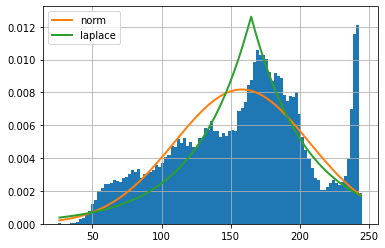

In [2]:
f = Fitter(labL_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

In [3]:
x = f.get_best(method='sumsquare_error').keys()

In [4]:
print(list(x)[0])

norm


{'norm': {'loc': 36.89929577617145, 'scale': 14.382826723549348}}

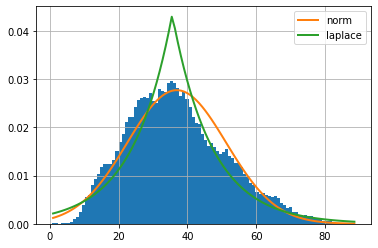

In [5]:
f = Fitter(labL_std_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 152.09274354272958, 'scale': 8.522590374822624}}

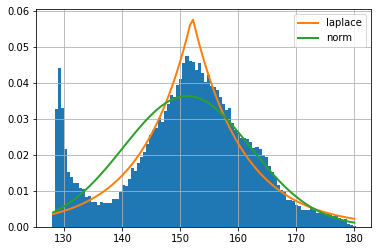

In [6]:
f = Fitter(labA_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 7.9830610564292215, 'scale': 2.1173884256157143}}

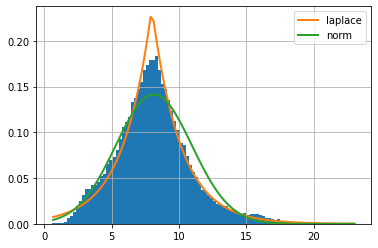

In [7]:
f = Fitter(labA_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 116.81240453672953, 'scale': 6.64275671706334}}

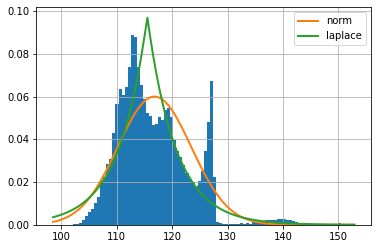

In [8]:
f = Fitter(labB_avg_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 6.128816659822057, 'scale': 2.0126497622485635}}

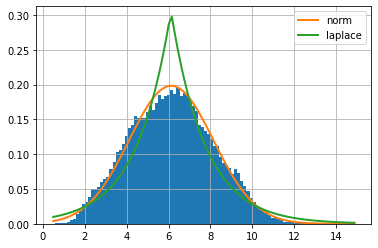

In [9]:
f = Fitter(labB_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

In [1]:
import numpy as np
dist = 'norm'
x = (np.random.normal if dist == 'norm' else np.random.laplace)(loc=10, scale=1,
                                                              size=1)
print(x)

[11.24729491]


In [2]:
x = None
print(x != None)


False
